In [1]:
import pandas as pd
train_df = pd.read_csv(r'train.csv')
train_right_df = train_df[train_df["target"]==1]
train_wrong_df = train_df[train_df["target"]==0]

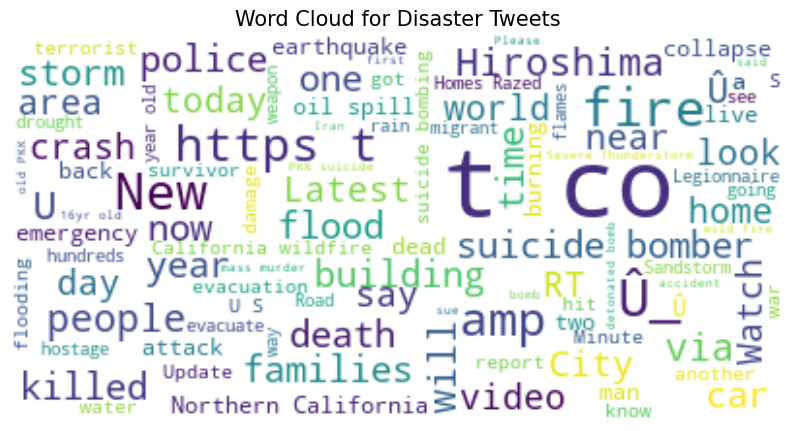

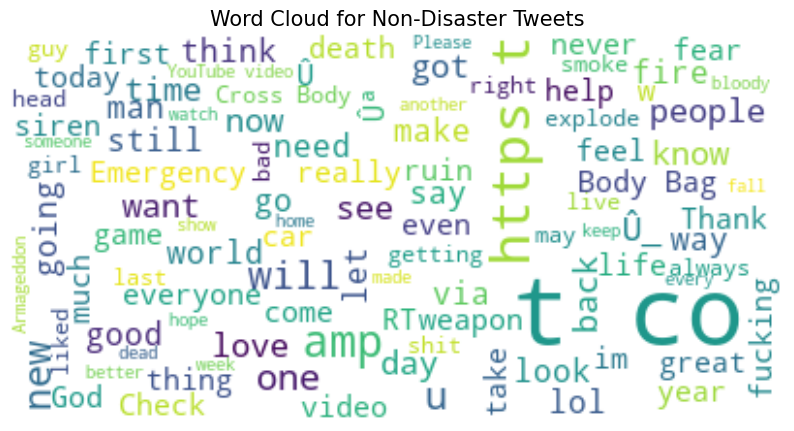

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()


generate_word_cloud(train_right_df['text'], "Word Cloud for Disaster Tweets")
generate_word_cloud(train_wrong_df['text'], "Word Cloud for Non-Disaster Tweets")

In [4]:
from NlpStudyFunctions import GetTopWords
top_words = 10
top_words_right = GetTopWords(train_right_df,top_words)
top_words_wrong = GetTopWords(train_wrong_df,top_words)

[nltk_data] Error loading punkt: HTTP Error 503: Service Unavailable
[nltk_data] Error loading stopwords: HTTP Error 503: Service
[nltk_data]     Unavailable


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\gmonteiro/nltk_data'
    - 'c:\\Users\\gmonteiro\\AppData\\Local\\anaconda3\\envs\\salesforce_project\\nltk_data'
    - 'c:\\Users\\gmonteiro\\AppData\\Local\\anaconda3\\envs\\salesforce_project\\share\\nltk_data'
    - 'c:\\Users\\gmonteiro\\AppData\\Local\\anaconda3\\envs\\salesforce_project\\lib\\nltk_data'
    - 'C:\\Users\\gmonteiro\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


C:\Users\guibe\AppData\Local\Temp\ipykernel_8784\3096321831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_right.values, y=keyword_right.index, ax=ax[0], palette="Reds_r")
C:\Users\guibe\AppData\Local\Temp\ipykernel_8784\3096321831.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_wrong.values, y=keyword_wrong.index, ax=ax[1], palette="Blues_r")


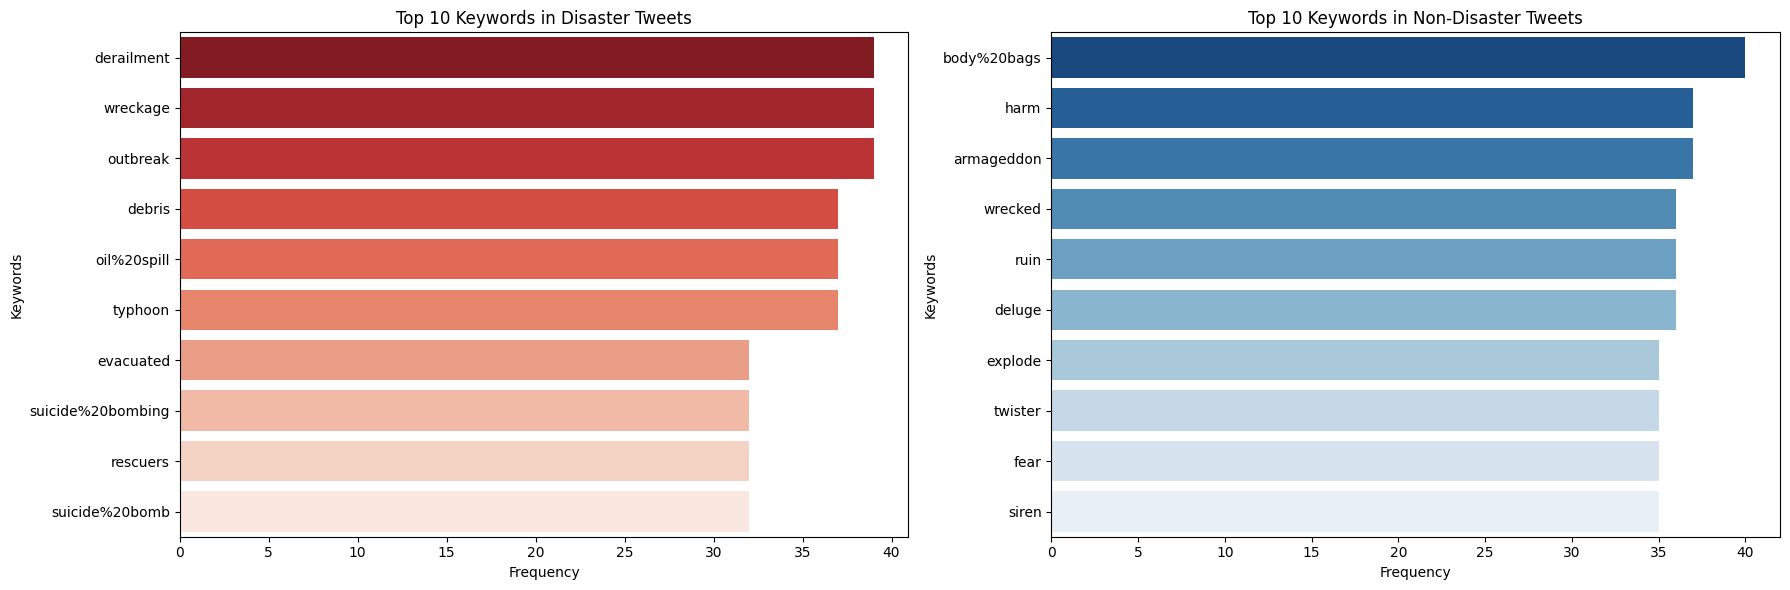

In [ ]:
import seaborn as sns

keyword_right = train_df[train_df['target'] == 1]['keyword'].value_counts().head(10)
keyword_wrong = train_df[train_df['target'] == 0]['keyword'].value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Disaster Keywords
sns.barplot(x=keyword_right.values, y=keyword_right.index, ax=ax[0], palette="Reds_r")
ax[0].set_title('Top 10 Keywords in Disaster Tweets')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Keywords')

# Non-Disaster Keywords
sns.barplot(x=keyword_wrong.values, y=keyword_wrong.index, ax=ax[1], palette="Blues_r")
ax[1].set_title('Top 10 Keywords in Non-Disaster Tweets')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Keywords')

plt.tight_layout()
plt.show()